We will build a basic Linear Regression Model that explains the relationship between a car's mileage (mpg) and other attributes of that car.

# Importing required libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and Understand the dataset

In [27]:
carData = pd.read_csv("auto-mpg.csv")
carData.shape

(398, 9)

In [28]:
carData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


We have 9 attributes:
1. mpg (Miles per gallon)
2. cylinders
3. engine displacement (inches)
4. horsepower
5. vehicle weight (Lbs)
6. time to accelerate from O to 60 mph (sec)
7. model year
8. origin of car (1. American, 2. European, 3. Japanese)
9. Car Name

Missing values in this dataset are marked by question mark.

In [29]:
#Droping car_name
carData = carData.drop("car name", axis=1)

#Replacing the categorical variable (origin) with actual values
carData['origin'] = carData['origin'].replace({1:'america', 2:'europ', 3:'asia'})
carData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


# Create Dummy Variables

String values like america cannot be read into equations. Using substitutes like 1, 2 and 3 for america, europ and asia respectively can harm the model. So we will create simple true or false columns for each category (america, europ and asia) and they will be used as independent variables.

In [30]:
carData = pd.get_dummies(carData, columns=['origin'])
carData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europ
0,18.0,8,307.0,130,3504,12.0,70,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,1,0,0


# Dealing with missing values

In [31]:
#Summary of numerical variables
carData.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin_america,origin_asia,origin_europ
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.625628,0.198492,0.175879
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.484569,0.399367,0.381197
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [32]:
#horsepower is missing cause it does not seem to be recognized as numerical column
carData.dtypes

mpg               float64
cylinders           int64
displacement      float64
horsepower         object
weight              int64
acceleration      float64
model year          int64
origin_america      uint8
origin_asia         uint8
origin_europ        uint8
dtype: object

In [33]:
#Check if each value in horsepower column is digit
hpIsDigit = pd.DataFrame(carData.horsepower.str.isdigit())
#Print if not digit
carData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europ
32,25.0,4,98.0,?,2046,19.0,71,1,0,0
126,21.0,6,200.0,?,2875,17.0,74,1,0,0
330,40.9,4,85.0,?,1835,17.3,80,0,0,1
336,23.6,4,140.0,?,2905,14.3,80,1,0,0
354,34.5,4,100.0,?,2320,15.8,81,0,0,1
374,23.0,4,151.0,?,3035,20.5,82,1,0,0


In [34]:
#Replace missing values denoted by question mark with NaN
carData = carData.replace('?',np.nan)
carData[hpIsDigit['horsepower'] == False]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_america,origin_asia,origin_europ
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0


In [35]:
#calculating median values
carData.median()

mpg                 23.0
cylinders            4.0
displacement       148.5
horsepower          93.5
weight            2803.5
acceleration        15.5
model year          76.0
origin_america       1.0
origin_asia          0.0
origin_europ         0.0
dtype: float64

In [36]:
#Replace the missing values with median values
medianFiller = lambda x: x.fillna(x.median())
carData = carData.apply(medianFiller, axis=0)

#Convert the horsepower column from object to float
carData['horsepower'] = carData['horsepower'].astype('float64')

# BiVariate plots

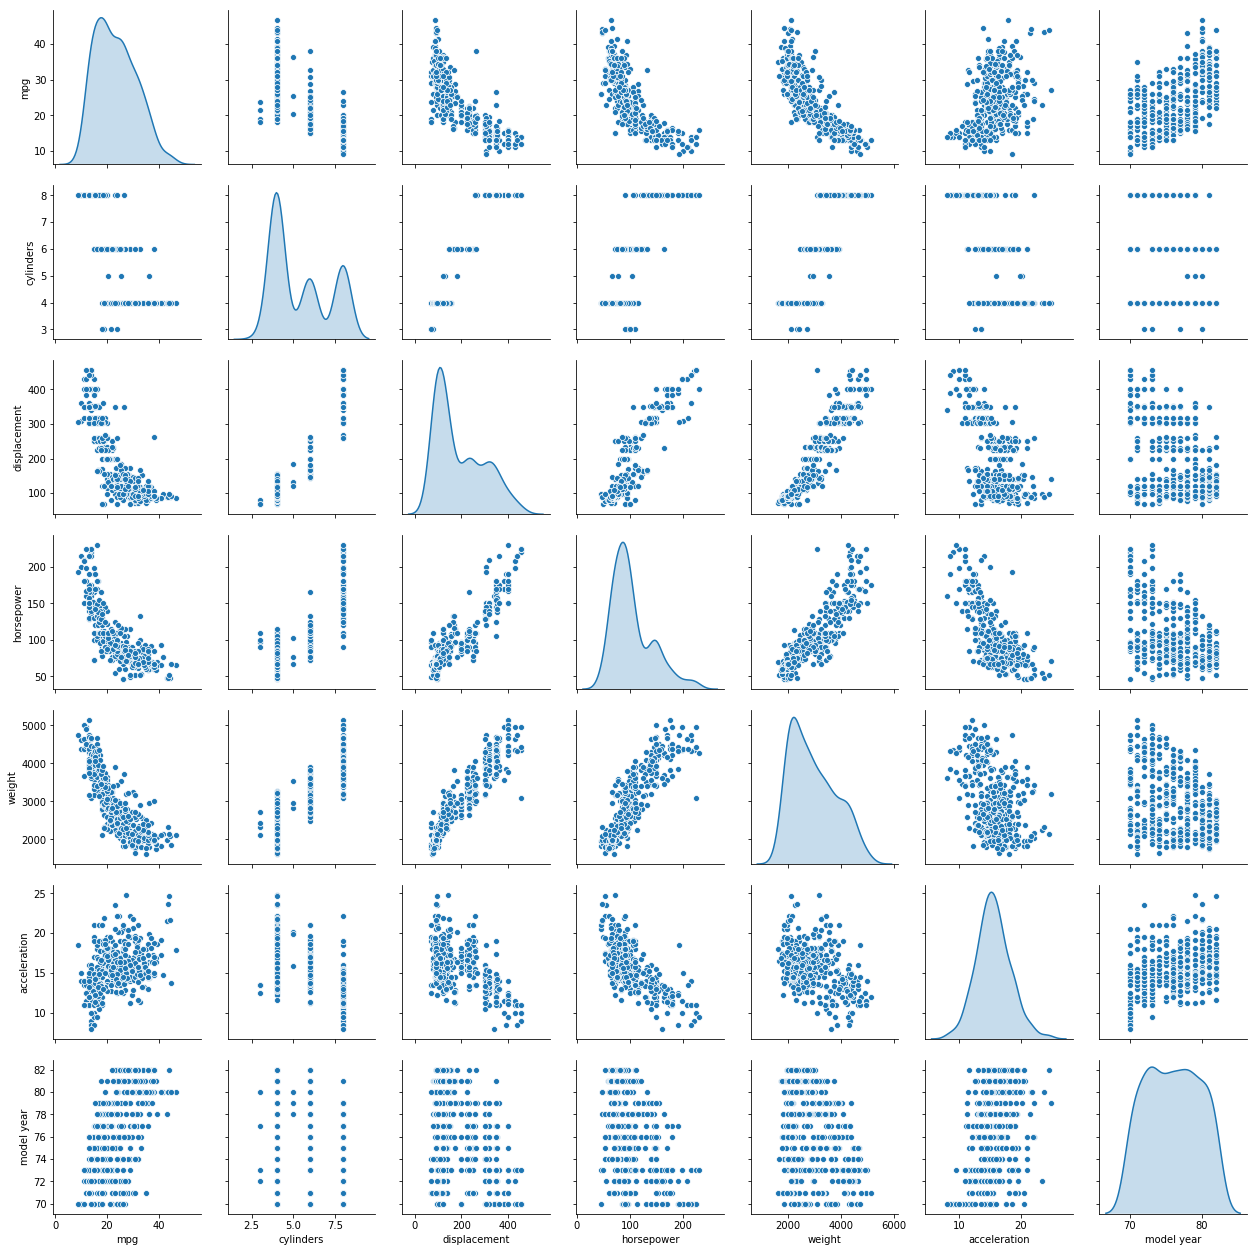

In [37]:
#Scatter matrix plot can be used form seaborn library
import seaborn as sns
carData_attr = carData.iloc[:,0:7]
sns.pairplot(carData_attr,diag_kind='kde')

Try to observe patterns/relatonship between variables.

# Build the Linear Model

In [38]:
#Split the data

#Independent variables
X = carData.drop(['mpg','origin_europ'], axis=1)
#The dependent variable
y = carData[['mpg']]
                 
#Split X and y into train and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit Linear Model

In [39]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
#Coefficient for each variable
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

#The intercept
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The coefficient for cylinders is -0.3948079661648244
The coefficient for displacement is 0.028945510765487174
The coefficient for horsepower is -0.02175220772354676
The coefficient for weight is -0.007352032065147351
The coefficient for acceleration is 0.061919366007618326
The coefficient for model year is 0.8369338917644993
The coefficient for origin_america is -3.0012830009185123
The coefficient for origin_asia is -0.6060179643247369
The intercept for our model is -18.283451116372067


In [41]:
#The R^2 score for in-sample
regression_model.score(X_train,y_train)

0.8141025501610559

In [42]:
#The R^2 score for out of sample
regression_model.score(X_test,y_test)

0.8433135132808833

# Adding interaction terms

In [43]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly.fit_transform(X_train)
X_test2 = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2, y_train)

y_pred = poly_clf.predict(X_test2)

#In sample
print(poly_clf.score(X_train2, y_train))

0.9015975294597637


In [44]:
#Out of sample
print(poly_clf.score(X_test2, y_test))

0.8647441062986904


In [45]:
# but this improves at the cost of 29 extra variables!
print(X_train.shape)
print(X_train2.shape)

(278, 8)
(278, 37)


We added 29 extra column for improving the out of sample R^2 score by 2% 